# Logistic Regression with ROC curve and ROC AUC score

In [11]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [9]:
Counter(y)

Counter({0: 501, 1: 499})

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
# Create a dummy model with default 0 as output
dummy_model_prob=[0 for _ in range(len(y_test))]
len(dummy_model_prob)

250

In [12]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Prediction based on probability
model_prob=model.predict_proba(X_test)

In [ ]:
# Lets focus on the positive outcome
model_prob=model_prob[:,1]

In [18]:
## Lets calculate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [19]:
# Calculate ROC Curves
dummy_fpr,dummy_tpr,dummy_thresholds=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,model_thresholds=roc_curve(y_test,model_prob)

In [23]:
model_thresholds

array([           inf, 9.99738592e-01, 9.87040875e-01, 9.86379569e-01,
       9.57807758e-01, 9.57072190e-01, 9.45358918e-01, 9.40467971e-01,
       9.28352122e-01, 9.27301113e-01, 9.25546499e-01, 9.23675753e-01,
       8.94689922e-01, 8.93893406e-01, 8.43433686e-01, 8.38350348e-01,
       8.28678141e-01, 8.26515102e-01, 8.08619980e-01, 8.06380714e-01,
       7.80387324e-01, 7.64061119e-01, 7.63865215e-01, 7.63295056e-01,
       7.58516782e-01, 7.55239387e-01, 7.52535126e-01, 7.47974480e-01,
       7.23463245e-01, 7.22944858e-01, 6.74522461e-01, 6.56742619e-01,
       6.55332712e-01, 6.26800183e-01, 5.99853807e-01, 5.57961256e-01,
       5.39054551e-01, 5.14148751e-01, 5.05106145e-01, 4.96241078e-01,
       4.90022043e-01, 4.84956016e-01, 4.69101337e-01, 4.50840890e-01,
       4.46447154e-01, 4.39735016e-01, 4.24228884e-01, 3.24445069e-01,
       3.12824361e-01, 3.06577477e-01, 3.01384481e-01, 2.10359803e-01,
       2.06155010e-01, 1.91025094e-01, 1.69812812e-01, 1.42728321e-01,
      

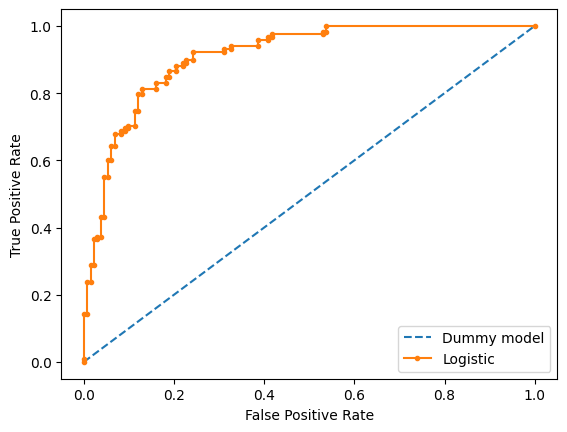

In [21]:
# Plot the roc curves for the model
plt.plot(dummy_fpr,dummy_tpr,linestyle="--",label="Dummy model")
plt.plot(model_fpr,model_tpr,marker=".",label="Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

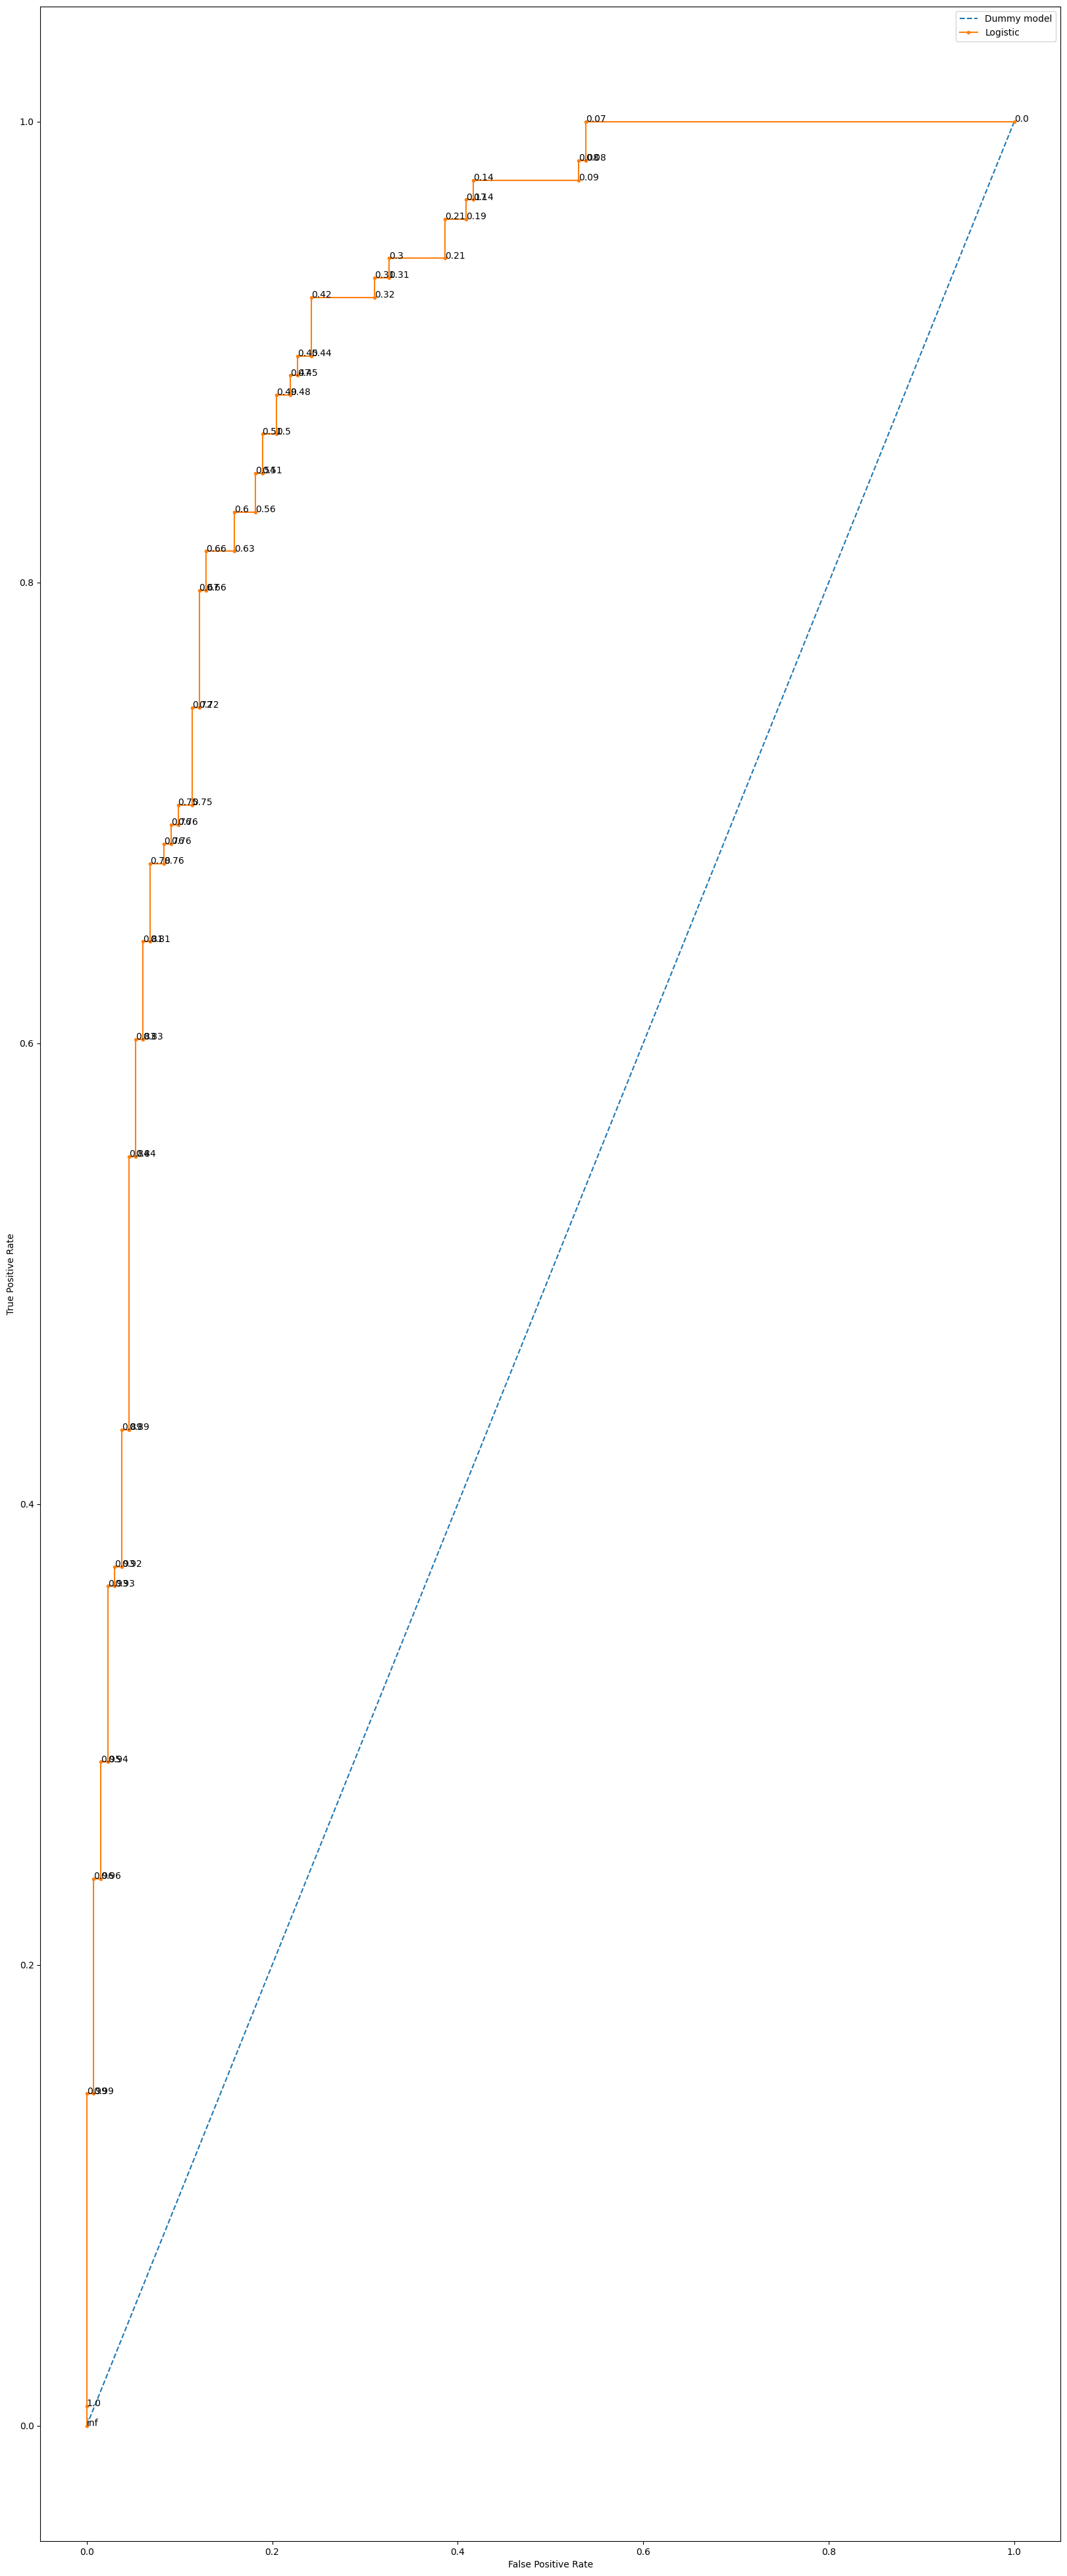

In [31]:
import numpy as np
fig=plt.figure(figsize=(20,50))
ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,model_thresholds):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
plt.plot(dummy_fpr,dummy_tpr,linestyle="--",label="Dummy model")
plt.plot(model_fpr,model_tpr,marker=".",label="Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()